# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
#This is a data set containing every fatal crash in missouri from 2016 to 2020. It was downloaded from the missouri state highway patrol web page:
#https://www.mshp.dps.missouri.gov/TR15Map/Search
#I would have liked to use all crashes for these years, but the web page does not let you export if there is more than 10,000 cases and there is more than that per month
#This data set is publicaly available. The data on this web page has been scrubbed of personal information and many of the other variable columns have been deleted.
#This data set is not nearly as complete as something we would use for real world analysis, but it will definitely at least show proof of concept.
#The data set has 17 columns and 4316 rows
import pandas as pd

fatalities = pd.read_csv('Fatalities2016_2020.csv')

fatalities.shape

(4316, 17)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [2]:
#It appears that the Report Number is has the greatest number of distinct values, as to be expected as each one should be unique

fatalities.nunique(axis=0)

Map              2
Rpt No        4315
Weekday          8
Date          1618
Time          1193
Veh Count        9
Agency         166
Troop            9
County         115
City           271
Type            17
Severity         1
At Street     3410
On Street     1253
Light Cond       6
Injured         14
Killed           5
dtype: int64

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [3]:
#I'm probably missing the point with this solution, but the code from #2 will tell you this information. Any column that only has 1 unique value
#has the same value for every row. In this case, the column "Severity" has the same value for every column which makes sense as this data set
#was filtered to only include fatal crashes. Maybe this is a cheater's way out of it, but it works!

fatalities.nunique(axis=0)

Map              2
Rpt No        4315
Weekday          8
Date          1618
Time          1193
Veh Count        9
Agency         166
Troop            9
County         115
City           271
Type            17
Severity         1
At Street     3410
On Street     1253
Light Cond       6
Injured         14
Killed           5
dtype: int64

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

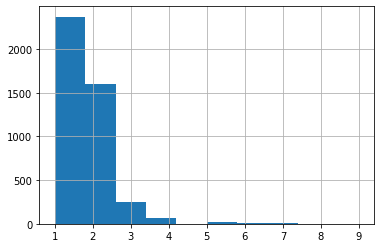

In [4]:
#this graph shows an overwhelming number of fatal crashes in this time frame occured with 1 and 2 vehicles involved. Very few occured with 3+ vehicles involved

fatalities['Veh Count'].hist()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [25]:
import matplotlib.pyplot as plt
import numpy as np

import datetime

fatalities['Date'] = fatalities['Date'].astype("datetime64")

fatalities['Month'] = fatalities['Date'].dt.month

fatalities['Year'] = fatalities['Date'].dt.year

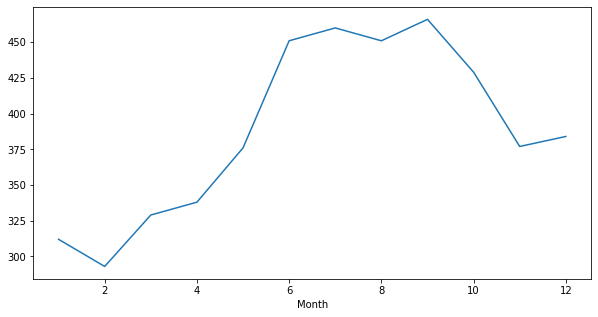

In [26]:
#It is interesting to see there is a rather large increase in fatal crashes Jun-Sep.The warmer months pose less weather related issues indicating
#the warmer weather may change driving behavior.
fatalities.groupby('Month')['Killed'].agg('sum').plot(figsize = (10,5))

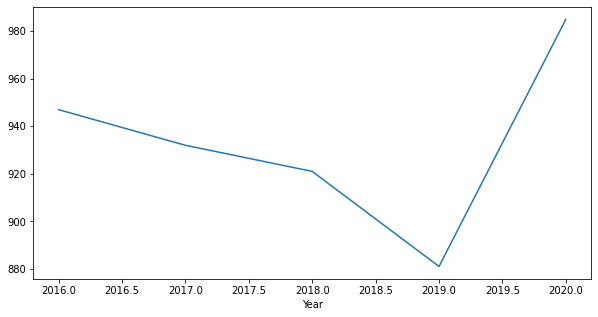

In [27]:
#This is really surprising to see such a large jump in fatalities for 2020. 
#In my final project, I'll add in data that has VMT (vehicle miles traveled) for the state. VMT was drastically lower (10-15%+ accross the country) in 2020
#so it is surprising to see a large jump in fatalities. This may indicate the lower traffic volumes and lack of enforcement prompted an increase in 
#dangerous driving behavior.
fatalities.groupby('Year')['Killed'].agg('sum').plot(figsize = (10,5))

In [28]:
#This filters the data to only include St. Louis City

stl_filter = fatalities['County'] == 'ST. LOUIS CITY'

stl_fatalities = fatalities[stl_filter]

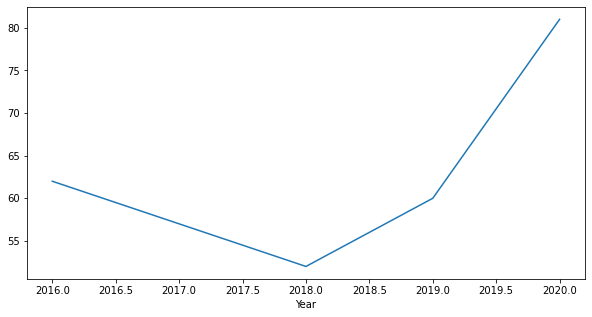

In [29]:
#This again is pretty shocking to see the massive increase during the pandemic year. 
#By the nature of the variability of crashes, the number of crashes and fatalities wavers year to year with a downward trend over time
#if you expanded the data set back further. A 33% increase between 2019 and 2020 is massive and very surprising to see again considering
#the low traffic volumes due to the pandemic

stl_fatalities.groupby('Year')['Killed'].agg('sum').plot(figsize = (10,5))

In [30]:
byyear = stl_fatalities.groupby('Year')['Killed'].agg('sum')

In [31]:
byyear.head()

Year
2016    62
2017    57
2018    52
2019    60
2020    81
Name: Killed, dtype: int64

Text(0.5, 1.0, 'STL Fatal Crashes by Year 2016-2020')

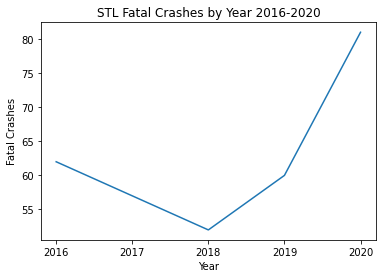

In [40]:
x = [2016, 2017, 2018, 2019, 2020]

y = [62, 57, 52, 60, 81]

plt.plot(x, y, label = 'Fatalities by Year')
plt.xticks(np.arange(2016, 2021, 1))
plt.xlabel('Year')
plt.ylabel('Fatal Crashes')
plt.title('STL Fatal Crashes by Year 2016-2020')

In [33]:
statebyyear = fatalities.groupby('Year')['Killed'].agg('sum')

In [34]:
statebyyear.head()

Year
2016    947
2017    932
2018    921
2019    881
2020    985
Name: Killed, dtype: int64

Text(0.5, 1.0, 'MO Fatal Crashes by Year 2016-2020')

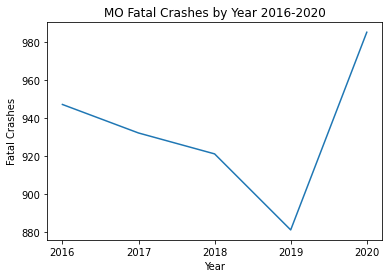

In [39]:
x = [2016, 2017, 2018, 2019, 2020]

y = [947, 932, 921, 881, 985]

plt.plot(x, y, label = 'Fatalities by Year')
plt.xticks(np.arange(2016, 2021, 1))
plt.xlabel('Year')
plt.ylabel('Fatal Crashes')
plt.title('MO Fatal Crashes by Year 2016-2020')

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [10]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

---

In [11]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push

Updating d20534e..ab20703
Fast-forward
 week09/feedback.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 week09/feedback.md
[main 58c1bb3] Submitting the week 12 assignment
 2 files changed, 470 insertions(+), 2 deletions(-)
 create mode 100644 week12/week12_assignment_2.ipynb


From github.com:nsokolis/hds5210-2021
   d20534e..ab20703  main       -> origin/main
To github.com:nsokolis/hds5210-2021.git
   ab20703..58c1bb3  main -> main



---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.